In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [1]:
import os
HOME = os.getcwd()

print(HOME)

/home/dev/Downloads/Bleeding_model4


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-1.11.0+cu102 CPU
Setup complete ✅ (8 CPUs, 15.4 GB RAM, 301.0/467.9 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="1DNXpKl8PWSnwIn8dOwA")
project = rf.workspace("wictronix-xs7mo").project("data-ef2xx")
dataset = project.version(6).download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Data-6 in yolov8:: 100%|██████████| 12813/12813 [00:01<00:00, 9309.13it/s] 


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=100 imgsz=224 batch=8 plots=True

/content
100% 131M/131M [00:00<00:00, 252MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/Data-6/data.yaml, epochs=100, patience=50, batch=8, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optim

In [ ]:
!ls {HOME}/runs/detect/train/

/content


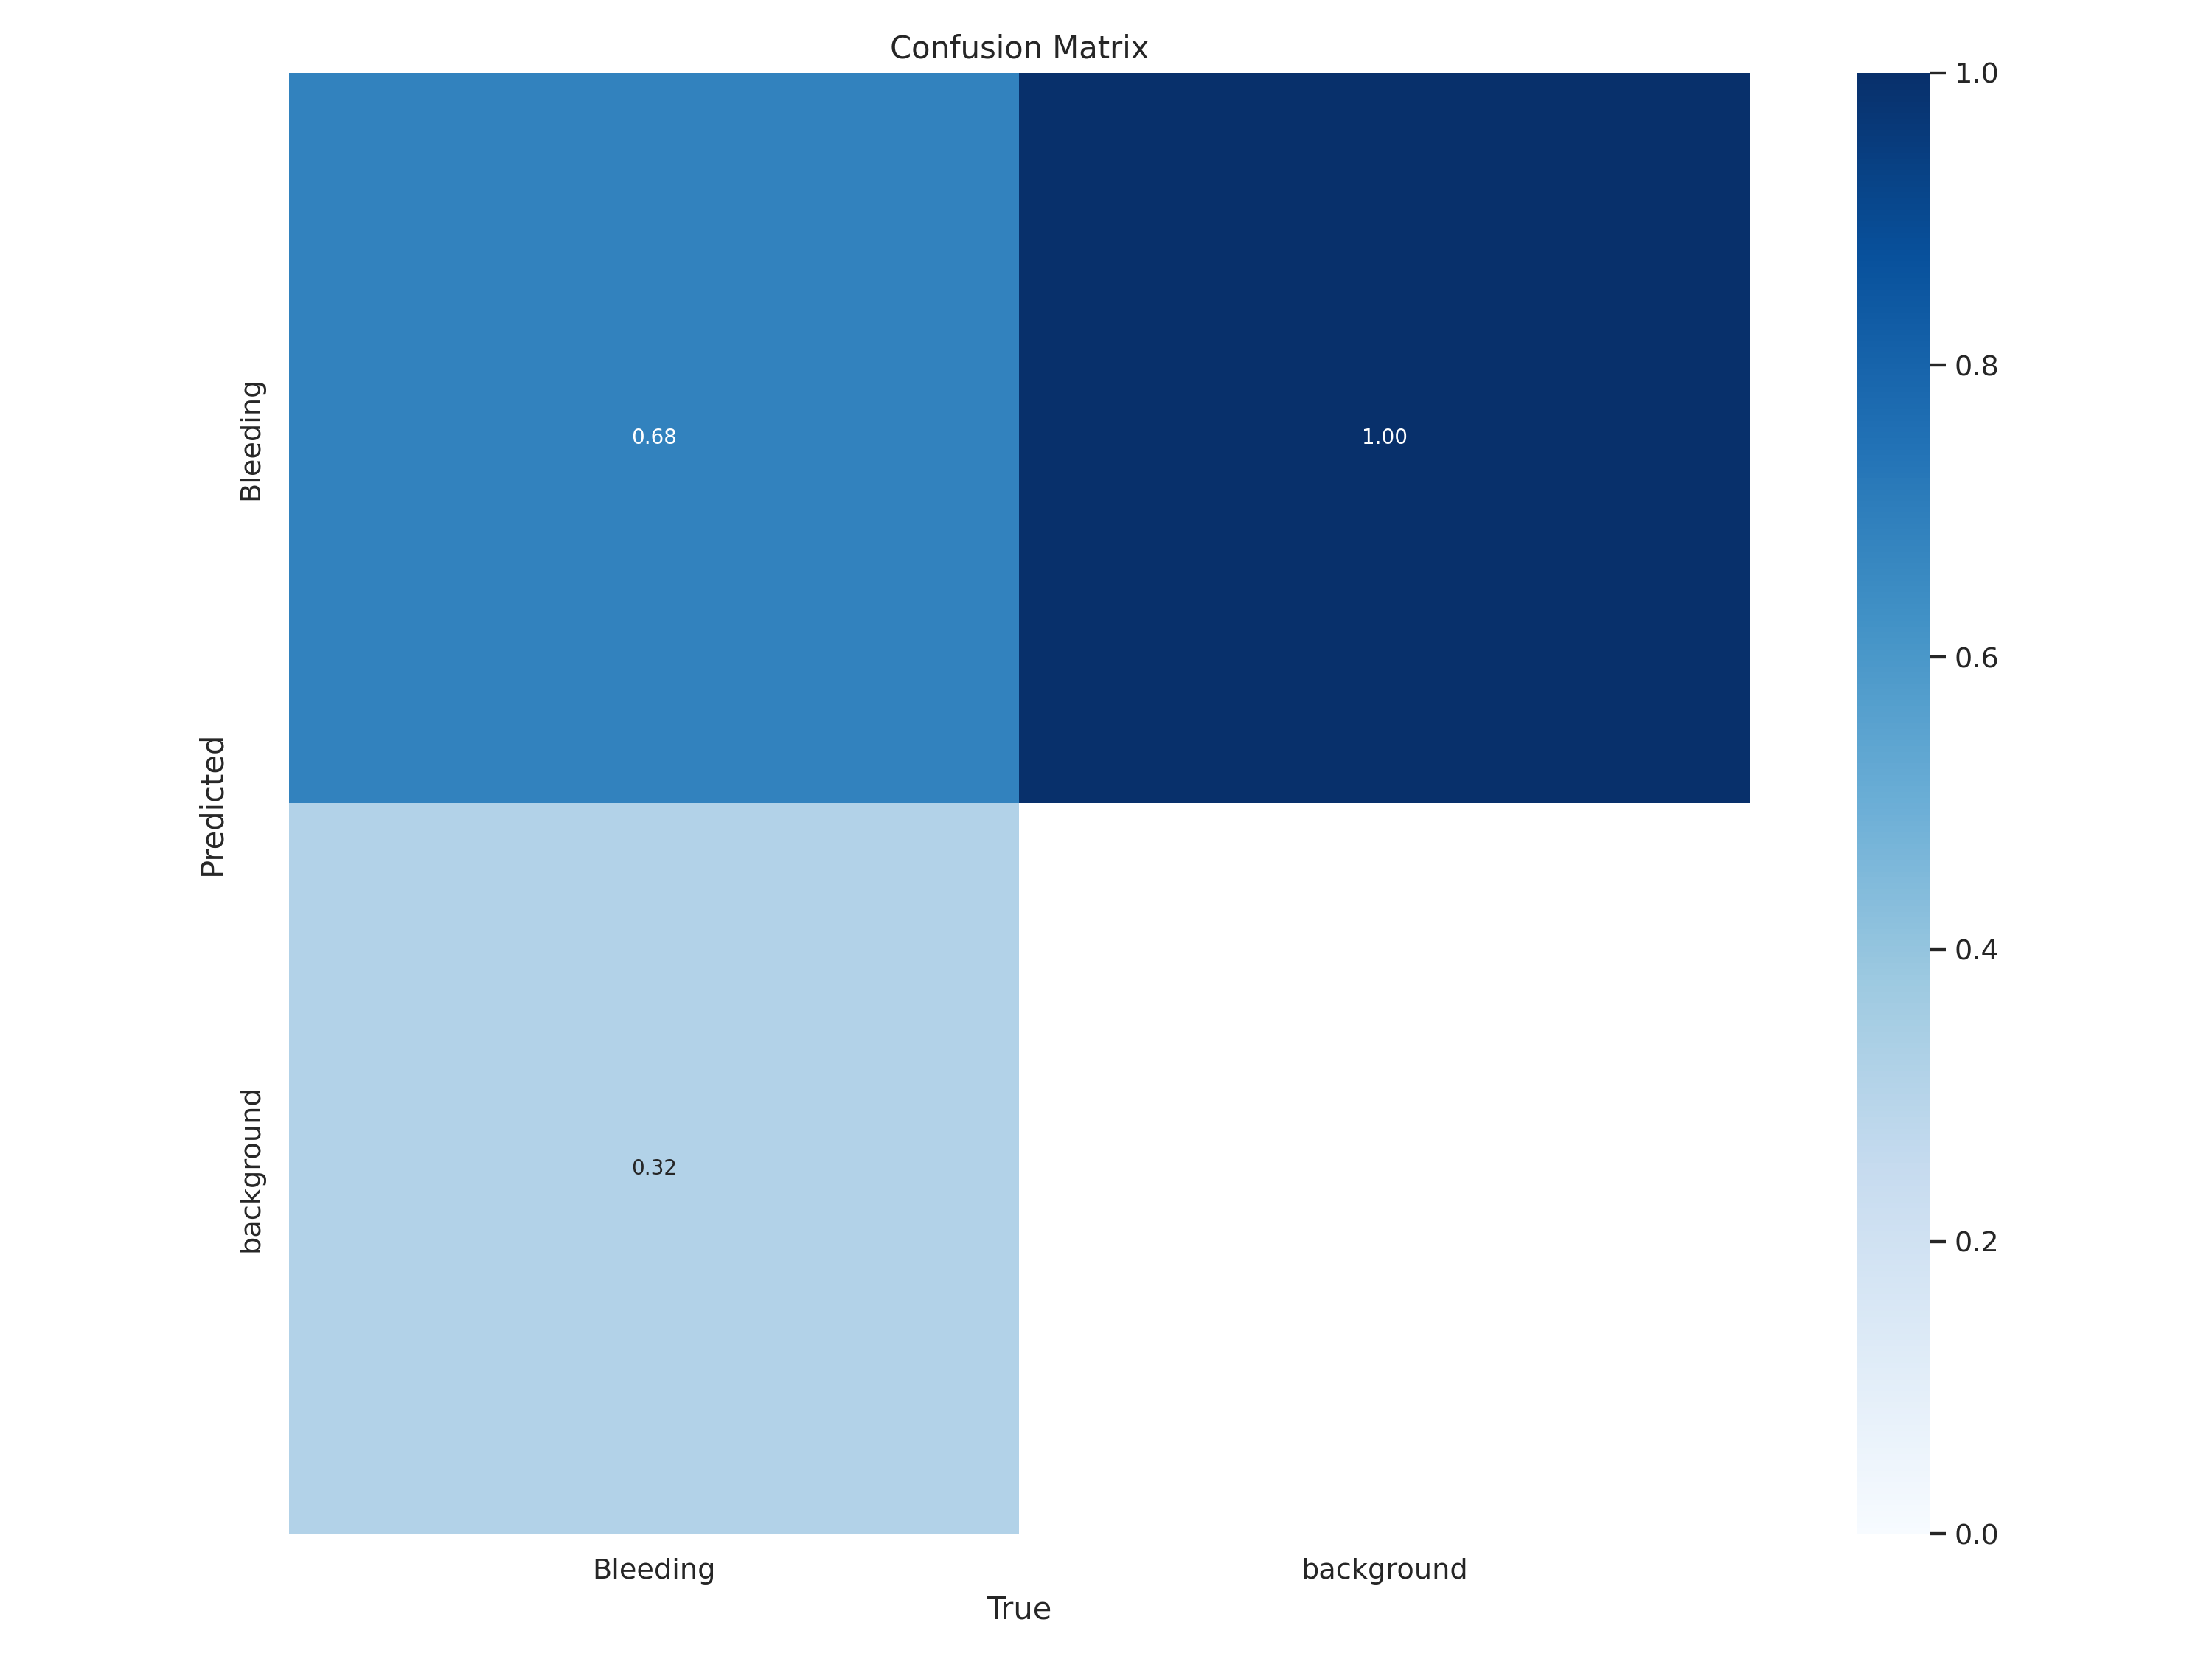

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


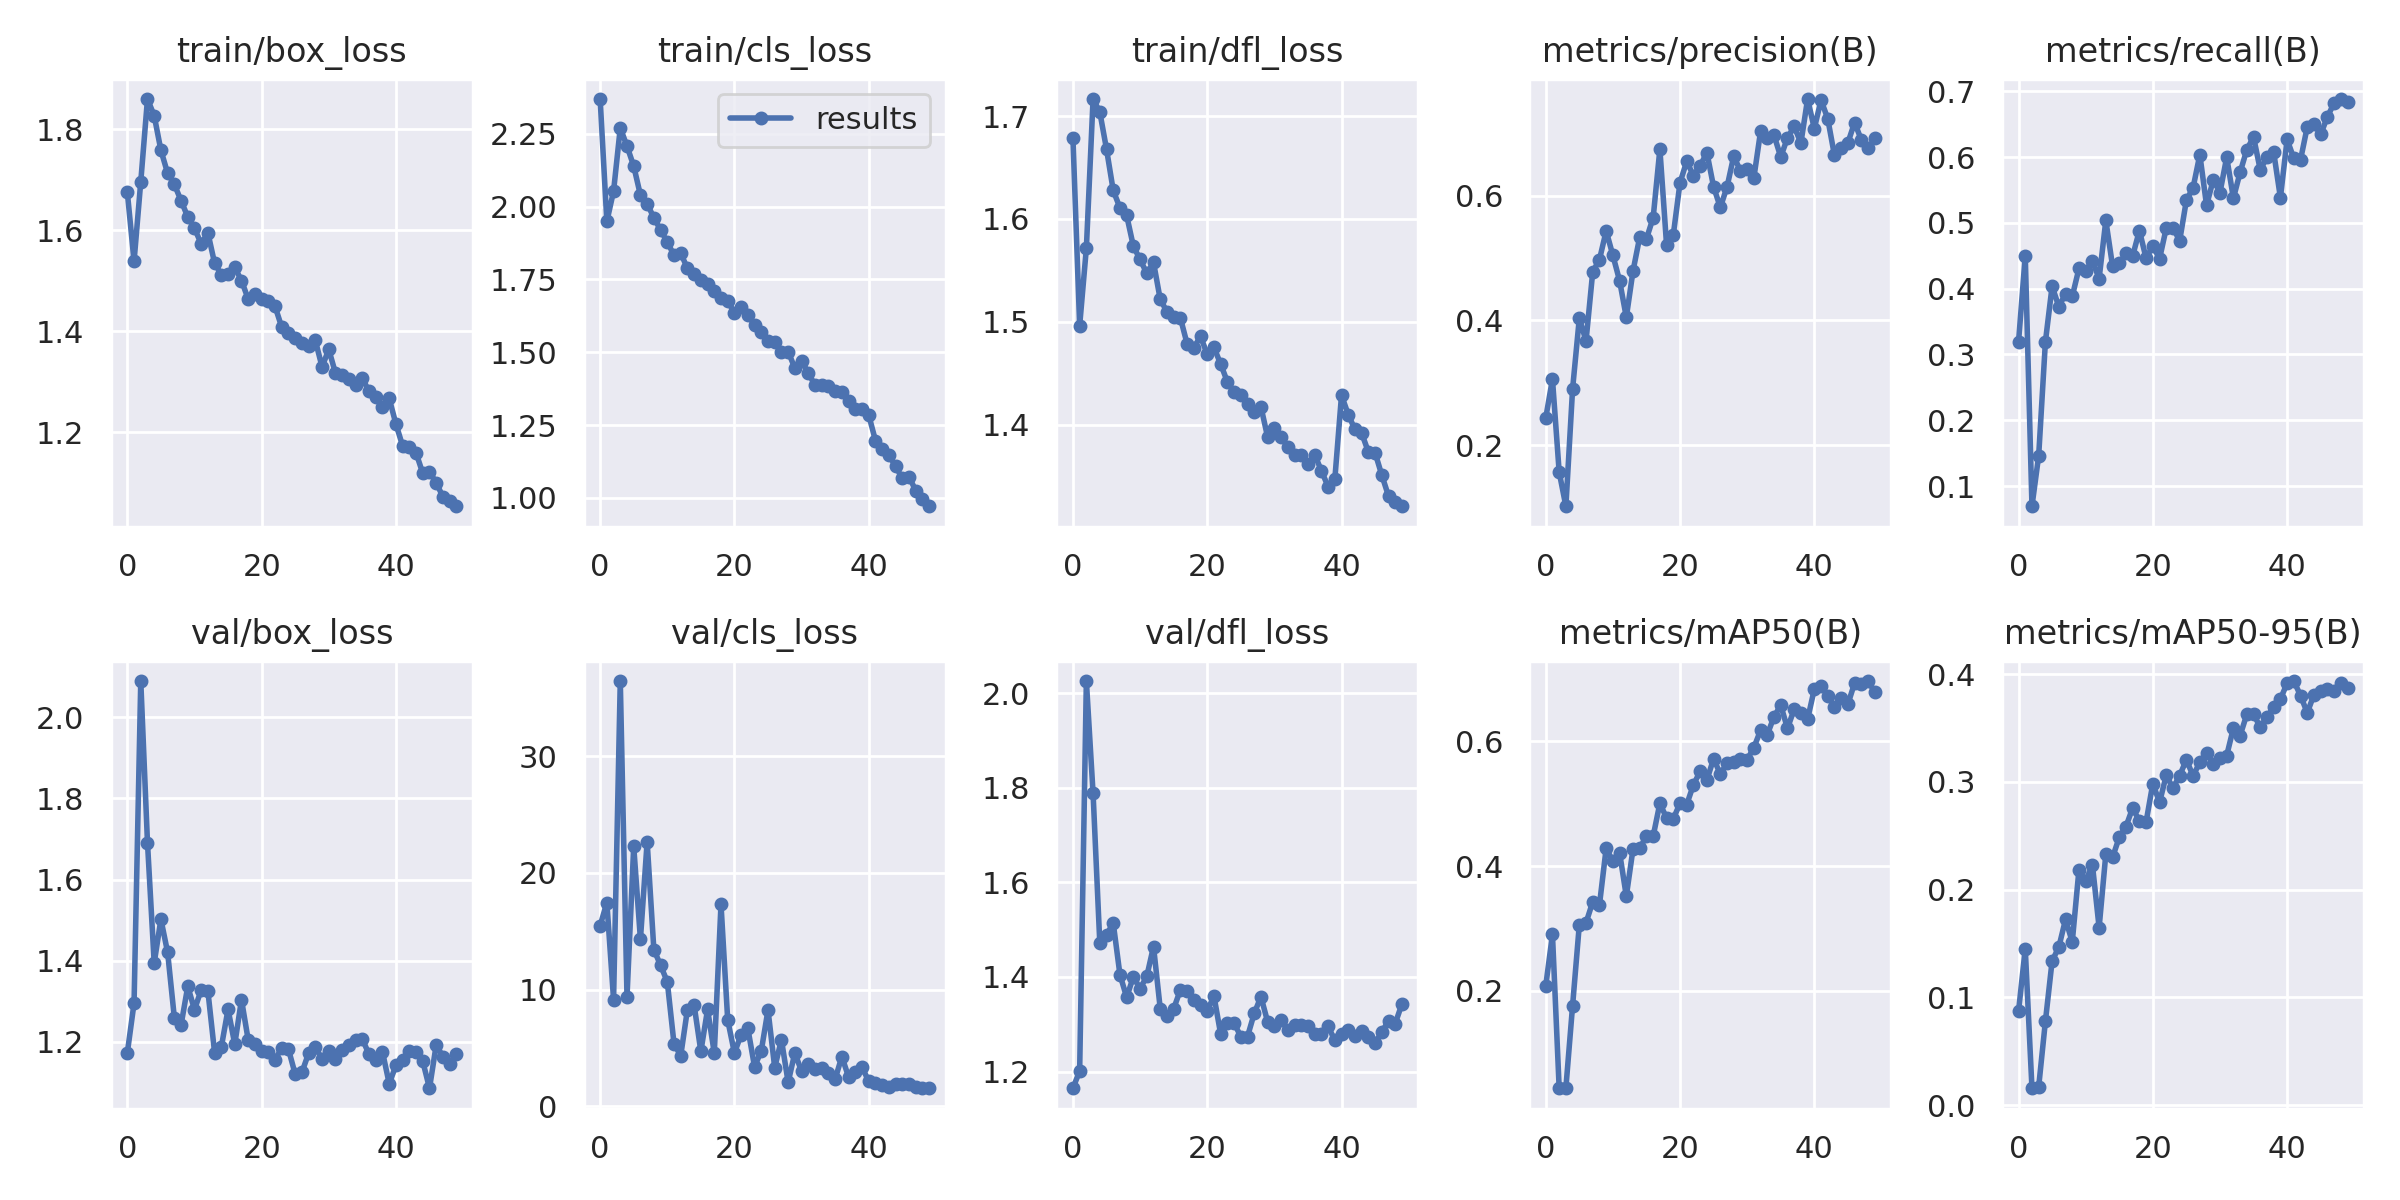

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


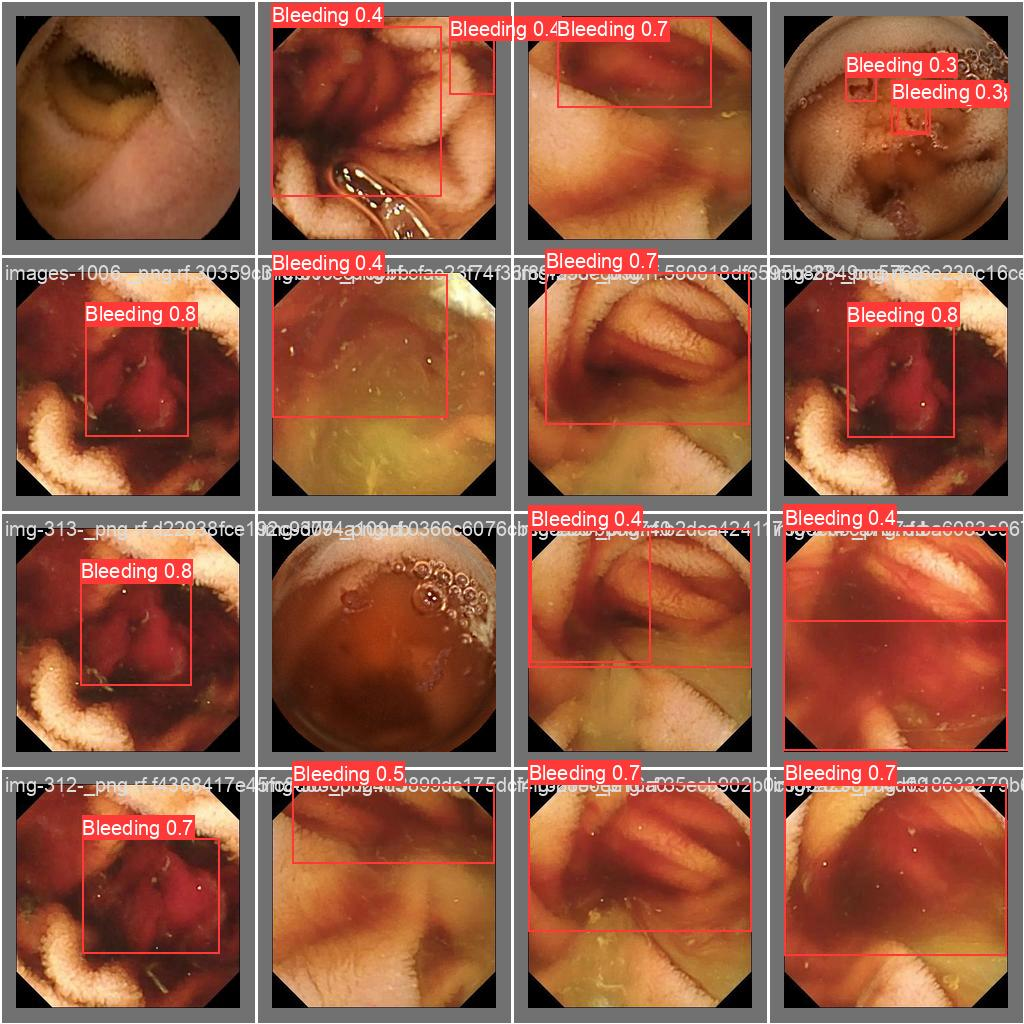

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-21 08:09:26.561237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-21 08:09:27.425609: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Data-6/valid/labels.cache... 492 images, 232 backgrounds, 0 corrupt: 100% 492/492 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:04<00:00,  6.85it/s]
                   all        492        260      0.748      0.604      0.688      0.393
Speed: 0.1ms pre-process, 3.4ms i

## Inference with Custom Model

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model='/home/dev/Downloads/Bleeding_model4/runs/detect/train/weights/best.pt' conf=0.25 source='/home/dev/Downloads/Bleeding_model4/Auto-WCEBleedGen Challenge Test Dataset/Test Dataset 1' save=True

/home/dev/Downloads/Bleeding_model4
Traceback (most recent call last):
  File "/home/dev/anaconda3/envs/ml/bin/yolo", line 5, in <module>
    from ultralytics.yolo.cfg import entrypoint
  File "/home/dev/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.hub import start
  File "/home/dev/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/hub/__init__.py", line 5, in <module>
    from ultralytics.hub.auth import Auth
  File "/home/dev/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/hub/auth.py", line 5, in <module>
    from ultralytics.hub.utils import HUB_API_ROOT, PREFIX, request_with_credentials
  File "/home/dev/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/hub/utils.py", line 14, in <module>
    from ultralytics.yolo.utils import (ENVIRONMENT, LOGGER, ONLINE, RANK, SETTINGS, TESTS_RUNNING, TQDM_BAR_FORMAT,
  File "/home/dev/anaconda3/envs/ml/lib/python3.10/site-packages/ultralytics/yolo/

**NOTE:** Let's take a look at few results.

In [14]:
import shutil
shutil.make_archive('/content/runs','zip','/content')

'/content/runs.zip'